<a href="https://colab.research.google.com/github/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture3_Digital_Audio_Signals/audioIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recording-and-playback-of-audio-with-Python-and-sounddevice" data-toc-modified-id="Recording-and-playback-of-audio-with-Python-and-sounddevice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recording and playback of audio with Python and sounddevice</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Selecting-the-sound-card" data-toc-modified-id="Selecting-the-sound-card-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Selecting the sound card</a></span></li><li><span><a href="#Recording-of-audio-data" data-toc-modified-id="Recording-of-audio-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Recording of audio data</a></span></li><li><span><a href="#Playback-of-audio-data" data-toc-modified-id="Playback-of-audio-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Playback of audio data</a></span></li><li><span><a href="#Simultaneous-playback-and-recording" data-toc-modified-id="Simultaneous-playback-and-recording-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Simultaneous playback and recording</a></span></li><li><span><a href="#Frame-based-audio-processing" data-toc-modified-id="Frame-based-audio-processing-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Frame-based audio processing</a></span></li></ul></li></ul></div>

# Recording and playback of audio with Python and sounddevice
Audio Processing, MED4, Aalborg University, 2020

By Jesper Kjær Nielsen (jkn@create.aau.dk), Audio Analysis Lab, Aalborg University.

Last edited: 2020-02-09

## Introduction

This guide will take you through the basics of how you read/write audio data with your computer. We will use Python along with the **sounddevice** module for this (note that alternative modules such as **PyAudio** also can be used for this).

If you are interested in more details than provided here, please go to the homepage of [sounddevice](https://python-sounddevice.readthedocs.io/en/0.3.14/).


### Loading the sounddevice module
We first load the required libraries. If you have not installed sounddevice, you will get an error when running the next cell. You can install sounddevice either
1. through **anaconda's** graphical user interface,
2. via `pip` in a terminal window, or
3. or via `conda` in a terminal window

Please go to the [installation instructions](https://python-sounddevice.readthedocs.io/en/0.3.14/installation.html) to see more details.

In [2]:
!sudo apt-get install libportaudio2
!pip install sounddevice
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 1s (87.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160975 file

## Selecting the sound card
We might sometimes have access to multiple sound cards so we first have to choose which one we wish. To see the sound cards, we have access to, run the following cell.

In [7]:
deviceList  = sd.query_devices()
print(deviceList)

When you run the cell above, a list of devices including some information will be printed out. A `*` in the margin will indicate the default device. The default device (input, output) can also be seen by running:

In [6]:
print(sd.default.device)

[-1, -1]


Each element in the `deviceList` list is a Python dictionary. Thus, if you only want to know the default sampling frequency of your first device, you have to run:

In [8]:
# print default sampling frequency in Hz of the first device
print(deviceList[0]['default_samplerate']) 

IndexError: ignored

Please read through the [documentation of query_devices](https://python-sounddevice.readthedocs.io/en/0.3.11/#sounddevice.query_devices) to make yourself familiar with what the output means.

Once we have listed the devices, we will now select and set-up the device, we wish to use. We can do this by running the following cell.

In [ ]:
samplingFreq = 48000 # Hz
recDeviceName = 'default'
playDeviceName = 'default'
# the default sampling frequency when nothing is specified (typical values are 44100 and 48000)
sd.default.samplerate = samplingFreq
# use None if you wish to disable the input or output
sd.default.device = (recDeviceName, playDeviceName)
# number of input and output channels to use (if you want to specify which channel number to use, see the `mapping` argument)
sd.default.channels = (1,2)

## Recording of audio data 
To get audio data on your computer, we need the following basic elements:
1. A microphone: converts pressure variations into voltage variations
2. Microphone pre-amplifier: amplifies the microphone signal to the so-called line level which is expected by the A/D-converter
3. A/D-converver: converts the analogue voltage signal into a gigital signal
4. Sound card: acts as the interface between the computer and the A/D-converter.

Note that some or all of these elements might be integrated in the same device. For example, all these things are most likely integrated into your computer.

Let us make a 5 second recording and plot it.

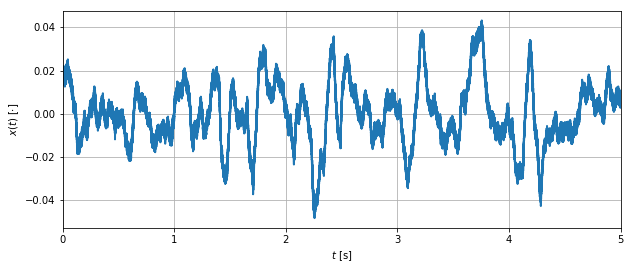

In [ ]:
recTime = 5 # s
# note that we use the default setup specified above
micData = sd.rec(recTime*samplingFreq)
# wait for the recording to finish
sd.wait()
# plot the recorded sound
timeVector = np.arange(recTime*samplingFreq)/samplingFreq
plt.figure(figsize=(10,4))
plt.plot(timeVector, micData, lineWidth=2)
plt.xlim((timeVector[0],timeVector[-1]))
plt.xlabel('$t$ [s]')
plt.ylabel('$x(t)$ [$\cdot$]')
plt.grid(True)

## Playback of audio data 
To play audio data from your computer, we need the following basic elements:
1. Sound card: acts as the interface between the computer and the D/A-converter.
2. D/A-converter: converts a digital signal to a voltage (analogue signal)
3. Amplifier: amplifies the voltage
4. Loudspeaker: converts the amplified voltage into pressure variations 

Note that some or all of these elements might be integrated in the same device. For example, all these things are most likely integrated into your computer.

Let us now play back what you just recorded on the left channel and a 1 kHz sine tone on the right channel.

In [ ]:
sinusoid = 0.02*np.sin(2*np.pi*1000*timeVector)
# the reshape command makes the sinusoid into a column vector (same as micData)
concatenatedData = np.append(micData, np.reshape(sinusoid,(-1,1)), axis=1)
# note that we use the default setup specified above
sd.play(concatenatedData)

## Simultaneous playback and recording
This is your job. By using the soundmodule's [documentation](https://python-sounddevice.readthedocs.io/en/0.3.14/usage.html) and the information provided here, please do the following.
1. Write a function that will playback a 440 Hz sinusoid while also recording it. The duration should be 10 seconds.
2. Plot the played back and recorded sinusoid on top of each other. Do they differ in terms of amplitude, phase, and/or frequency? Why/why not?
 
Tip: use sounddevice's `playrec` function.

## Frame-based audio processing
In many situations, we wish to simultaneously process data and playback/record it. This can also be done using sounddevice, but is slightly more involved. You have to look into `streams`. If you have more time, you can start playing around with it. Start by reading this [description of callback streams](https://python-sounddevice.readthedocs.io/en/0.3.14/usage.html#callback-streams).